In [1]:
''' this is the part 2 of the single step of ctlm measurement. 
Here we save the results in a txt file and we do the linear regression
'''

!pip install pandas
!pip install -U scikit-learn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import os 
from sklearn.linear_model import LinearRegression
import sys

In [3]:
resistance = [199.0687, 203.1307, 207.3624, 211.7744, 216.3797, 221.1893, 226.2174, 231.4787, 236.9896, 242.7693, 248.838, 255.2181, 261.9341, 269.0141, 276.4874, 284.3889, 292.7551, 301.6264, 311.0509, 321.0848, 331.7863, 343.2259, 355.4841, 368.6504, 382.8311, 398.1461, 414.7365, 432.7694, 452.4416, 473.9852, 491.4541, 488.2188, 485.5548, 482.6365, 480.0089, 477.8993, 475.462, 473.3512, 471.7728, 469.9153, 468.2796, 467.1869, 465.7367, 465.1277, 463.9013, 462.756, 462.8145, 461.8933, 460.749, 462.548, -9.9e+307, 459.826, 459.255, 460.9573, 462.064, 462.1692, 463.4757, 464.6631, 465.969, 466.9178, 468.4606, 470.2536, 471.66, 473.7292, 475.982, 478.0425, 480.7104, 483.5262, 486.6198, 489.6606, 493.1878, 473.9649, 452.4223, 432.7527, 414.7214, 398.1343, 382.8215, 368.6438, 355.4759, 343.2188, 331.7775, 321.0737, 311.0401, 301.6142, 292.7427, 284.3794, 276.4811, 269.0093, 261.9302, 255.2141, 248.8343, 242.7657, 236.9855, 231.4752, 226.2149, 221.1874, 216.3789, 211.7756, 207.3632, 203.1304, 199.0674]
print(len(resistance))

101


In [4]:
voltage = [-9.953434, -9.953406, -9.953396, -9.953398, -9.953468, -9.95352, -9.953564, -9.953582, -9.953562, -9.95354, -9.95352, -9.953506, -9.953494, -9.953522, -9.953548, -9.95361, -9.953674, -9.953672, -9.953628, -9.953628, -9.953588, -9.953552, -9.953556, -9.953562, -9.953608, -9.953652, -9.953676, -9.953696, -9.953716, -9.95369, -9.829082, -9.276158, -8.739986, -8.20482, -7.680142, -7.16849, -6.656468, -6.153566, -5.661274, -5.169068, -4.682796, -4.204682, -3.725894, -3.255894, -2.783408, -2.31378, -1.851258, -1.38568, -0.921498, -0.462548, -0.003156, 0.459826, 0.91851, 1.382872, 1.848256, 2.310846, 2.780854, 3.252642, 3.727752, 4.20226, 4.684606, 5.17279, 5.65992, 6.15848, 6.663748, 7.170638, 7.691366, 8.219946, 8.759156, 9.303552, 9.863756, 9.953262, 9.95329, 9.953312, 9.953314, 9.953358, 9.95336, 9.953382, 9.953324, 9.953344, 9.953324, 9.953284, 9.953284, 9.95327, 9.953252, 9.953278, 9.953318, 9.953344, 9.953348, 9.95335, 9.953374, 9.953392, 9.953392, 9.953434, 9.953456, 9.953434, 9.95343, 9.953454, 9.953434, 9.95339, 9.95337]
print(len(voltage))

101


In [5]:
current=[-0.05, -0.049, -0.048, -0.047, -0.046, -0.045, -0.044, -0.043, -0.042, -0.041, -0.04, -0.039, -0.038, -0.037, -0.036, -0.035, -0.034, -0.033, -0.032, -0.031, -0.03, -0.029, -0.028, -0.027, -0.026, -0.025, -0.024, -0.023, -0.022, -0.021, -0.02, -0.019, -0.018, -0.017, -0.016, -0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]
print(len(current))

101


In [6]:
#we need to find element which has current value 0
resistance[current.index(0)]=float('NAN')
print(resistance[current.index(0)])

nan


In [7]:
#Here we plot the current and the resistance
fig, (ax1, ax2) = plt.subplots(2,sharex=True) #the plots share the same x axis 
fig.suptitle('CTLM plot')
ax1.set_title('I(V)')
ax1.set(xlabel='Voltage(V)',ylabel='Current(A)')
ax1.plot(voltage, current)
ax2.set_title('R(V)')
ax2.set(xlabel='Voltage(V)',ylabel='Resistance(Ohm)')
ax2.plot(voltage,resistance)
fig.tight_layout() #leave space between plots 
plt.show()

In [8]:
'''lets test the linear regression fitting.
for these tasks the are are two methods.

Method 1: measure the slope. the current step is constant. so we need only the voltage difference.
when the second derivative I''(V) is big then we are not in the linear region(for a line is I''(V)=0)  
then dv should be big 

Method 2: do a linear regression. delete the points that have the biggest distance from the line. and do a linear regression again
'''

#method 1
mini=sys.float_info.min
print(mini)
#define the voltage differences
derivative=[]
for i in range(1,len(voltage)):
    element = 0.001*(abs(voltage[i]-voltage[i-1])+mini)**(-1) #0,001 is the delta I
    derivative.append(element)

print(len(derivative))
print(derivative)

2.2250738585072014e-308
100
[35.71428571382516, 100.00000000378577, 499.999999930111, 14.285714285530066, 19.230769231365876, 22.727272726848575, 55.5555555532727, 49.999999997451994, 45.45454545553223, 49.999999997451994, 71.42857143671338, 83.33333332168517, 35.71428571382516, 38.46153846141788, 16.129032258120592, 15.624999999984373, 499.999999930111, 22.727272727766113, 4.49423283715579e+304, 24.99999999983622, 27.777777778006993, 249.9999999650555, 166.6666666927136, 21.73913043510191, 22.727272726848575, 41.66666666701049, 49.999999997451994, 50.000000001892886, 38.46153846141788, 0.008025166923471992, 0.0018085668193097094, 0.0018650731481688694, 0.001868579095084515, 0.001905930875699001, 0.0019544534175572467, 0.0019530410802660826, 0.0019884589840565335, 0.0020313147481575977, 0.0020316696667655437, 0.002056462226901814, 0.0020915513873260363, 0.002088607066175425, 0.0021276595744680864, 0.002116464826471049, 0.002129344928326249, 0.002162059318259456, 0.0021478678116234012, 

In [9]:
second_derivative=[]
for i in range(1,len(derivative)):
    element= abs(derivative[i]-derivative[i-1])*(abs(voltage[i]-voltage[i-1])+mini)**(-1)
    second_derivative.append(element) 

print(len(second_derivative))
print(second_derivative)

99
[2295918.367468986, 39999999.99414683, 242857142.78834438, 70643.64208245775, 67240.45183829192, 746097.3369502604, 308641.9753106898, 227272.72708440654, 206611.57009174748, 1071428.5719084693, 850340.1347377702, 3968253.9667669935, 98116.16955561754, 858942.5462779719, 8129.552550612436, 7568359.373900659, 238636363.56781635, inf, inf, 69444.44445381437, 6172839.505246729, 20833333.315173436, 24154589.38004353, 21481.354168721293, 430440.77135928307, 347222.2221045946, 0.0002220446049137159, 576923.0770455912, 1478981.2805528403, 0.04988925353237568, 0.00010219547145567937, 6.538847451275899e-06, 6.979475642041189e-05, 9.24806106950275e-05, 2.760347445459181e-06, 6.917262107966249e-05, 8.521692914536852e-05, 7.209514027161509e-07, 5.0370292390321e-05, 7.215953298611137e-05, 6.158198987294379e-06, 8.15653447719269e-05, 2.3818612759654342e-05, 2.7260282537895074e-05, 6.966022028756236e-05, 3.068287916262347e-05, 1.387433645885984e-05, 5.2908539128618934e-05, 4.567810652435912e-06, 3

In [10]:
#we have two less values, we delete also the last 2 voltages 
voltage_new = voltage.copy() 
current_new = current.copy() 
voltage_new.pop()
voltage_new.pop()
current_new.pop()
current_new.pop()
print(len(voltage_new))
print(len(current_new))   

99
99


In [11]:
indexes=[]
for i in range(len(second_derivative)):
    if second_derivative[i]>10:
        indexes.append(i)
print(list(reversed(indexes)))

for i in list(reversed(indexes)):
    voltage_new.pop(i)
    current_new.pop(i)

print(voltage_new)
print(current_new)
print(len(voltage_new))
print(len(current_new))

[98, 97, 96, 95, 94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 77, 76, 75, 74, 73, 72, 71, 70, 28, 27, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[-9.953676, -9.95369, -9.829082, -9.276158, -8.739986, -8.20482, -7.680142, -7.16849, -6.656468, -6.153566, -5.661274, -5.169068, -4.682796, -4.204682, -3.725894, -3.255894, -2.783408, -2.31378, -1.851258, -1.38568, -0.921498, -0.462548, -0.003156, 0.459826, 0.91851, 1.382872, 1.848256, 2.310846, 2.780854, 3.252642, 3.727752, 4.20226, 4.684606, 5.17279, 5.65992, 6.15848, 6.663748, 7.170638, 7.691366, 8.219946, 8.759156, 9.303552, 9.953324, 9.953434]
[-0.024, -0.021, -0.02, -0.019, -0.018, -0.017, -0.016, -0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.028, 0.043]
44
44


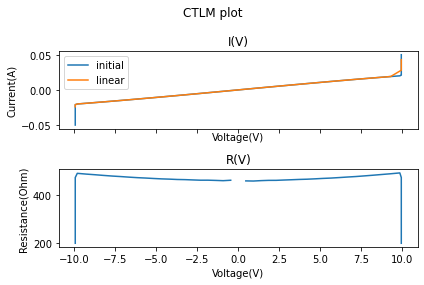

In [12]:
#Here we plot the current and the resistance
fig, (ax1, ax2) = plt.subplots(2,sharex=True) #the plots share the same x axis 
fig.suptitle('CTLM plot')
ax1.set_title('I(V)')
ax1.set(xlabel='Voltage(V)',ylabel='Current(A)')
ax1.plot(voltage, current,label="initial")
ax1.plot(voltage_new, current_new,label="linear")
ax2.set_title('R(V)')
ax2.set(xlabel='Voltage(V)',ylabel='Resistance(Ohm)')
ax2.plot(voltage,resistance)
fig.tight_layout() #leave space between plots 
ax1.legend()
plt.show()

In [13]:
#now we have to do the linear regression
x=np.array(voltage_new).reshape((-1,1)) #column matrix
y = np.array(current_new)

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9471925862102195


In [14]:
# method 2 is multiple linear regression
x=np.array(voltage).reshape((-1,1)) #column matrix
y = np.array(current)

print(x)
print(y)

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

[[-9.953434e+00]
 [-9.953406e+00]
 [-9.953396e+00]
 [-9.953398e+00]
 [-9.953468e+00]
 [-9.953520e+00]
 [-9.953564e+00]
 [-9.953582e+00]
 [-9.953562e+00]
 [-9.953540e+00]
 [-9.953520e+00]
 [-9.953506e+00]
 [-9.953494e+00]
 [-9.953522e+00]
 [-9.953548e+00]
 [-9.953610e+00]
 [-9.953674e+00]
 [-9.953672e+00]
 [-9.953628e+00]
 [-9.953628e+00]
 [-9.953588e+00]
 [-9.953552e+00]
 [-9.953556e+00]
 [-9.953562e+00]
 [-9.953608e+00]
 [-9.953652e+00]
 [-9.953676e+00]
 [-9.953696e+00]
 [-9.953716e+00]
 [-9.953690e+00]
 [-9.829082e+00]
 [-9.276158e+00]
 [-8.739986e+00]
 [-8.204820e+00]
 [-7.680142e+00]
 [-7.168490e+00]
 [-6.656468e+00]
 [-6.153566e+00]
 [-5.661274e+00]
 [-5.169068e+00]
 [-4.682796e+00]
 [-4.204682e+00]
 [-3.725894e+00]
 [-3.255894e+00]
 [-2.783408e+00]
 [-2.313780e+00]
 [-1.851258e+00]
 [-1.385680e+00]
 [-9.214980e-01]
 [-4.625480e-01]
 [-3.156000e-03]
 [ 4.598260e-01]
 [ 9.185100e-01]
 [ 1.382872e+00]
 [ 1.848256e+00]
 [ 2.310846e+00]
 [ 2.780854e+00]
 [ 3.252642e+00]
 [ 3.727752e+0

In [15]:
#here is the second linear regression
y_pred = model.predict(x)
print(y_pred)
plt.figure()
plt.plot(voltage,current,label="real curve")
plt.plot(x,y_pred,label="linear")
plt.legend()

[-3.28088667e-02 -3.28087744e-02 -3.28087415e-02 -3.28087481e-02
 -3.28089788e-02 -3.28091502e-02 -3.28092952e-02 -3.28093545e-02
 -3.28092886e-02 -3.28092161e-02 -3.28091502e-02 -3.28091040e-02
 -3.28090645e-02 -3.28091567e-02 -3.28092424e-02 -3.28094468e-02
 -3.28096577e-02 -3.28096511e-02 -3.28095061e-02 -3.28095061e-02
 -3.28093743e-02 -3.28092556e-02 -3.28092688e-02 -3.28092886e-02
 -3.28094402e-02 -3.28095852e-02 -3.28096643e-02 -3.28097302e-02
 -3.28097962e-02 -3.28097105e-02 -3.23990122e-02 -3.05766178e-02
 -2.88094366e-02 -2.70455712e-02 -2.53162734e-02 -2.36299082e-02
 -2.19423236e-02 -2.02847978e-02 -1.86622417e-02 -1.70399690e-02
 -1.54372544e-02 -1.38614279e-02 -1.22833800e-02 -1.07342966e-02
 -9.17701951e-03 -7.62916221e-03 -6.10472572e-03 -4.57021690e-03
 -3.04030918e-03 -1.52764573e-03 -1.35254853e-05  1.51242712e-03
  3.02421386e-03  4.55471484e-03  6.08858425e-03  7.61324486e-03
  9.16235462e-03  1.07173311e-02  1.22832567e-02  1.38471981e-02
  1.54369729e-02  1.70459

In [16]:
residuals=(y-y_pred)
print(residuals)
threshold = 0.001 #adjust this threshold as needed
outliers = abs(residuals) > threshold
print(outliers)

[-1.71911333e-02 -1.61912256e-02 -1.51912585e-02 -1.41912519e-02
 -1.31910212e-02 -1.21908498e-02 -1.11907048e-02 -1.01906455e-02
 -9.19071141e-03 -8.19078392e-03 -7.19084984e-03 -6.19089599e-03
 -5.19093554e-03 -4.19084325e-03 -3.19075756e-03 -2.19055321e-03
 -1.19034227e-03 -1.90348862e-04  8.09506117e-04  1.80950612e-03
  2.80937428e-03  3.80925563e-03  4.80926881e-03  5.80928859e-03
  6.80944020e-03  7.80958522e-03  8.80966432e-03  9.80973024e-03
  1.08097962e-02  1.18097105e-02  1.23990122e-02  1.15766178e-02
  1.08094366e-02  1.00455712e-02  9.31627335e-03  8.62990821e-03
  7.94232359e-03  7.28479777e-03  6.66224168e-03  6.03996904e-03
  5.43725441e-03  4.86142791e-03  4.28337996e-03  3.73429657e-03
  3.17701951e-03  2.62916221e-03  2.10472572e-03  1.57021690e-03
  1.04030918e-03  5.27645734e-04  1.35254853e-05 -5.12427123e-04
 -1.02421386e-03 -1.55471484e-03 -2.08858425e-03 -2.61324486e-03
 -3.16235462e-03 -3.71733112e-03 -4.28325667e-03 -4.84719807e-03
 -5.43697292e-03 -6.04598

In [17]:
x_clean = x[~outliers]
y_clean = y[~outliers]

print(x_clean)
print(y_clean)

[[-9.953672e+00]
 [-9.953628e+00]
 [-4.625480e-01]
 [-3.156000e-03]
 [ 4.598260e-01]
 [ 9.953284e+00]
 [ 9.953270e+00]]
[-0.033 -0.032 -0.001  0.     0.001  0.032  0.033]


In [18]:
model_clean = LinearRegression()
model_clean.fit(x_clean, y_clean)
y_pred_clean = model_clean.predict(x_clean)
r_sq = model.score(x_clean, y_clean)
print(r_sq)

0.9995469997854816


In [19]:
#here is the second linear regression
plt.figure()
plt.plot(voltage,current,label="real curve")
plt.plot(x,y_pred,label="linear")
plt.plot(x_clean,y_pred_clean,label="second regression")
plt.legend()
plt.show()

[0.005023391422157276, 0.004922938777841065, 0.004822475048514099, 0.004722006059278175, 0.004621505621830513, 0.004521014352864266, 0.0044205264493359046, 0.0043200519097437474, 0.004219594446338574, 0.004119136974897568, 0.0040186788191514155, 0.003918217399157819, 0.0038177541603021522, 0.0037172772728269634, 0.003616801344292724, 0.003516311642261706, 0.0034158243528464574, 0.0033153596634777328, 0.003214907913785171, 0.0031144420414793853, 0.003013988220731236, 0.0029135330404844156, 0.0028130653382246913, 0.002712597083849631, 0.0026121179810104245, 0.002511640827324442, 0.0024111695015992082, 0.002310699416363541, 0.0022102300053752793, 0.002109770516041429, 0.0020347780189441905, 0.0020482619677898517, 0.002059499772219325, 0.002071952701463731, 0.0020832947055773343, 0.0020924910331528, 0.0021032175021347657, 0.002112596313265922, 0.0021196643808205984, 0.002128043074996707, 0.002135476326536539, 0.002140470976390819, 0.002147135924654424, 0.0021499472080463065, 0.002155630949

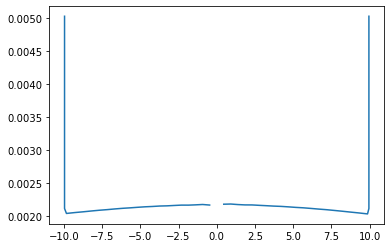

In [20]:
admitance=[]
for R in resistance:
    admitance.append(1/R)
print(admitance)

plt.figure()
plt.plot(voltage,admitance)

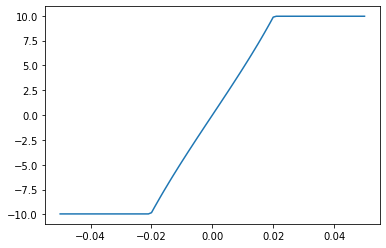

In [21]:
plt.figure()
plt.plot(current,voltage)

In [22]:
#define the voltage differences
derivative=[]
for i in range(1,len(voltage)):
    element = (voltage[i]-voltage[i-1])/0.001 #0,001 is the delta I
    derivative.append(element)

print(len(derivative))
print(derivative)


100
[0.02800000000036107, 0.009999999999621423, -0.002000000000279556, -0.07000000000090267, -0.05199999999838667, -0.04400000000082116, -0.018000000000739647, 0.020000000001019203, 0.0219999999995224, 0.020000000001019203, 0.013999999998404178, 0.012000000001677336, -0.02800000000036107, -0.026000000000081513, -0.06199999999978445, -0.064000000000064, 0.002000000000279556, 0.0439999999990448, 0.0, 0.04000000000026205, 0.035999999999702936, -0.004000000000559112, -0.005999999999062311, -0.04599999999932436, -0.04400000000082116, -0.023999999999801958, -0.020000000001019203, -0.019999999999242846, 0.026000000000081513, 124.60800000000027, 552.9239999999991, 536.1720000000005, 535.1660000000003, 524.6779999999998, 511.65199999999976, 512.0219999999999, 502.9020000000006, 492.2919999999999, 492.20599999999945, 486.27200000000045, 478.1139999999997, 478.7880000000002, 469.9999999999997, 472.48599999999993, 469.62800000000016, 462.5219999999999, 465.57800000000003, 464.18199999999996, 458.9

In [23]:
second_derivative=[]
for i in range(1,len(derivative)):
    element = (derivative[i]-derivative[i-1])/0.001 #0,001 is the delta I
    second_derivative.append(element)

print(len(second_derivative))
print(second_derivative)

99
[-18.000000000739647, -11.999999999900979, -68.00000000062312, 18.000000002516003, 7.99999999756551, 26.000000000081513, 38.00000000175885, 1.999999998503199, -1.999999998503199, -6.000000002615025, -1.9999999967268423, -40.000000002038405, 2.000000000279556, -35.999999999702936, -2.000000000279556, 66.00000000034356, 41.99999999876525, -43.9999999990448, 40.00000000026205, -4.000000000559112, -40.00000000026205, -1.999999998503199, -40.00000000026205, 1.999999998503199, 20.000000001019203, 3.999999998782755, 1.7763568394002505e-09, 45.99999999932436, 124582.00000000019, 428315.9999999988, -16751.99999999859, -1006.0000000001992, -10488.000000000511, -13026.000000000011, 370.0000000001751, -9119.999999999322, -10610.000000000695, -86.00000000046748, -5933.999999999002, -8158.000000000754, 674.0000000004898, -8788.000000000466, 2486.0000000002174, -2857.9999999997767, -7106.000000000278, 3056.0000000001537, -1396.0000000000719, -5231.999999999971, 442.0000000000073, 3589.999999999975

99
99
[70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 36, 35, 34, 33, 32, 31, 30, 29, 28, 26]
[-9.953434, -9.953406, -9.953396, -9.953398, -9.953468, -9.95352, -9.953564, -9.953582, -9.953562, -9.95354, -9.95352, -9.953506, -9.953494, -9.953522, -9.953548, -9.95361, -9.953674, -9.953672, -9.953628, -9.953628, -9.953588, -9.953552, -9.953556, -9.953562, -9.953608, -9.953652, -9.953696, -6.153566, 9.953262, 9.95329, 9.953312, 9.953314, 9.953358, 9.95336, 9.953382, 9.953324, 9.953344, 9.953324, 9.953284, 9.953284, 9.95327, 9.953252, 9.953278, 9.953318, 9.953344, 9.953348, 9.95335, 9.953374, 9.953392, 9.953392, 9.953434, 9.953456, 9.953434, 9.95343, 9.953454, 9.953434]
[-0.05, -0.049, -0.048, -0.047, -0.046, -0.045, -0.044, -0.043, -0.042, -0.041, -0.04, -0.039, -0.038, -0.037, -0.036, -0.035, -0.034, -0.033, -0.032, -0.031, -0.03, -0.029, -0.028, -0.027, -0.026, -0.025, -0.023, -0.013, 0.021, 0.022, 0.023

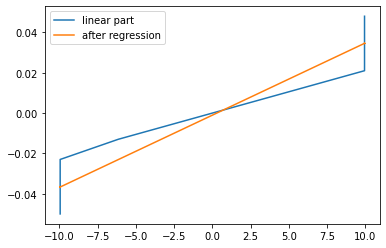

In [24]:
#we have two less values, we delete also the last 2 voltages 
voltage_new = voltage.copy() 
current_new = current.copy() 
voltage_new.pop()
voltage_new.pop()
current_new.pop()
current_new.pop()
print(len(voltage_new))
print(len(current_new))   
indexes=[]
for i in range(len(second_derivative)):
    if abs(second_derivative[i])<1 or abs(second_derivative[i])>100 :
        indexes.append(i)
print(list(reversed(indexes)))

for i in list(reversed(indexes)):
    voltage_new.pop(i)
    current_new.pop(i)

print(voltage_new)
print(current_new)
print(len(voltage_new))
print(len(current_new))

# method 2 is multiple linear regression
x=np.array(voltage_new).reshape((-1,1)) #column matrix
y = np.array(current_new)

print(x)
print(y)

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
current_new_pred=model.predict(x)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

plt.figure()
plt.plot(voltage_new,current_new,label="linear part")
plt.plot(voltage_new,current_new_pred,label='after regression')
plt.legend()
plt.show()

99
99
[98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[-9.95369, -9.829082, -9.276158, -8.739986, -8.20482, -7.680142, -7.16849, -6.656468, -6.153566, -5.661274, -5.169068, -4.682796, -4.204682, -3.725894, -3.255894, -2.783408, -2.31378, -1.851258, -1.38568, -0.921498, -0.462548, -0.003156, 0.459826, 0.91851, 1.382872, 1.848256, 2.310846, 2.780854, 3.252642, 3.727752, 4.20226, 4.684606, 5.17279, 5.65992, 6.15848, 6.663748, 7.170638, 7.691366, 8.219946, 8.759156, 9.303552, 9.863756]
[-0.021, -0.02, -0.019, -0.018, -0.017, -0.016, -0.015, -0.014, -0.013, -0.012, -0.011, -0.01, -0.009, -0.008, -0.007, -0.006, -0.005, -0.004, -0.003, -0.002, -0.001, 0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02]
42
42
[[-9.953690e+00]
 [-9.8290

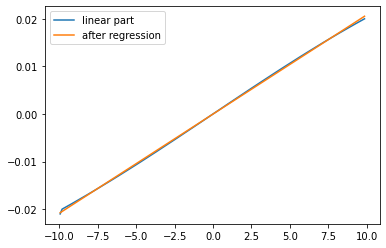

In [25]:
#we have two less values, we delete also the last 2 voltages 
voltage_new = voltage.copy() 
current_new = current.copy() 
voltage_new.pop()
voltage_new.pop()
current_new.pop()
current_new.pop()
print(len(voltage_new))
print(len(current_new))   
indexes=[]
for i in range(len(second_derivative)):
    if abs(derivative[i])<1:
        indexes.append(i)
print(list(reversed(indexes)))

for i in list(reversed(indexes)):
    voltage_new.pop(i)
    current_new.pop(i)

print(voltage_new)
print(current_new)
print(len(voltage_new))
print(len(current_new))

x=np.array(voltage_new).reshape((-1,1)) #column matrix
y = np.array(current_new)

print(x)
print(y)

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
current_new_pred=model.predict(x)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

plt.figure()
plt.plot(voltage_new,current_new,label="linear part")
plt.plot(voltage_new,current_new_pred,label='after regression')
plt.legend()
plt.show()